# The Adult Income Dataset
### A Machine Learning Analysis of USA Census Salary Data


#### The importance of census statistics :
The census is a special, wide-range activity, which takes place once a decade in the entire country. 
The purpose is to gather information about the general population, in order to present a full and reliable 
picture of the population in the country - its housing conditions and demographic, social and 
economic characteristics...

#### Objective of the Project :
The goal of this machine learning project is to predict whether a person makes over 50K a year or 
not given their demographic variation.
Source : https://archive.ics.uci.edu/ml/machine-learning-databases/adult/


age – The age of the individual

type_employer – The type of employer the individual has. Whether they are government, military, private, an d so on.

fnlwgt – The \# of people the census takers believe that observation represents. We will be ignoring this variable

education – The highest level of education achieved for that individual

education_num – Highest level of education in numerical form

marital – Marital status of the individual

occupation – The occupation of the individual

relationship – A bit more difficult to explain. Contains family relationship values like husband, father, and so on, but only contains one per observation. I’m not sure what this is supposed to represent

race – descriptions of the individuals race. Black, White, Eskimo, and so on

sex – Biological Sex

capital_gain – Capital gains recorded

capital_loss – Capital Losses recorded

hr_per_week – Hours worked per week

country – Country of origin for person

income – Boolean Variable. Whether or not the person makes more than \$50,000 per annum income.

In [96]:
#The income dataset was extracted from US Census database hosted on UCI’s Machine Learning Repository.
# aim : to predict whether the person makes <=50k or >50k per year
import pandas as pd
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [97]:
df.shape  # this dataset contains approx 32000 observations and 15 attributes

(32561, 15)

In [98]:
df.size  #this dataset contains 4lakh+ values

488415

In [99]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [100]:
df.info() # 9 object type and 6 int type variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [101]:
df.select_dtypes(['object']).columns.size

9

In [102]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [103]:
df.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [104]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [105]:
df.income.value_counts()  # approx 75% peoples income is <=50k

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [106]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [107]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [108]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [109]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [110]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [111]:
df.loc[::,(df == '?').any()].columns  # there are 3 variables contains '?' some values

Index(['workclass', 'occupation', 'native.country'], dtype='object')

In [112]:
import numpy as np
df = df.replace({'?' : np.NAN}) # replace '?' with NAN
df.isnull().sum() # now check their is null present or not

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

variable ['workclass','occupation','native.country'] having null values so we should replace them with another values


In [113]:
df['workclass']=df['workclass'].fillna('Private')
df['occupation']=df['occupation'].fillna('Other-service')
df['native.country']=df['native.country'].fillna('United-States')

In workclass var , private sector contains max numbers so we put private in place of null .


In occupation , prof-speciality are more but we put other-service instead of prof-speciality because other service will be more suitable.


In native.country , usa contains max obeservations so we should replace null values with usa

In [114]:
df.isnull().sum()  # no nulls are present 

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [115]:
educational_df=pd.DataFrame({'education':df['education'].unique(),'education_no':df['education.num'].unique()})
educational_df.sort_values('education_no',ascending = True)

,education,education_no
15,Preschool,1
11,1st-4th,2
12,5th-6th,3
2,7th-8th,4
14,9th,5
3,10th,6
8,11th,7
13,12th,8
0,HS-grad,9
1,Some-college,10


Education.num is clear seen replica in numerical of education column so we drop education column

In [116]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


 corr of final weight(fnlwgt) is very small hence drop fnlwgt

In [117]:
df.drop(['education','fnlwgt','relationship'],axis=1,inplace = True) # drop education and fnlwgt

In [118]:
# In chi2
# if porbability value is less than 5% then we reject the null hypothesis
# ho= there is no relation between given feature with dependent variable
# ha= there is relation between given feature with dependent variable

In [119]:
for cols in df.columns:
    if df[cols].dtype=='object':
        from scipy.stats import chi2_contingency
        chi_df=pd.crosstab(df[cols],df['income'])
        a,p_value,b,c=chi2_contingency(chi_df)
        if p_value < 0.05:
            print(f'{cols} has p_value of {p_value}')

workclass has p_value of 3.848177814824396e-195
marital.status has p_value of 0.0
occupation has p_value of 0.0
race has p_value of 2.305960610160958e-70
sex has p_value of 0.0
native.country has p_value of 8.005212705688595e-45
income has p_value of 0.0


hence all p_value is less tha 0.05 so the independent variabls having relationship between dependent variable

### Visualization

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='income', ylabel='count'>

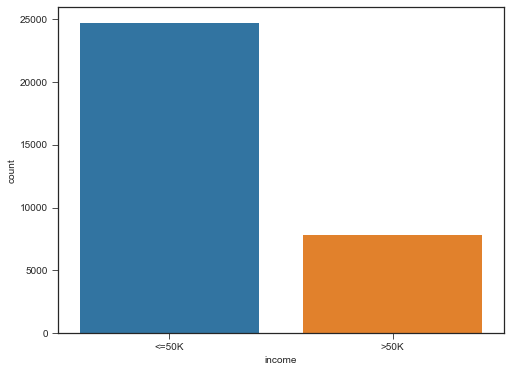

In [121]:
fig = plt.figure(figsize=(8,6))
plt.style.use('seaborn-ticks')
sns.countplot(x="income", data=df)

 data is imbalanced

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

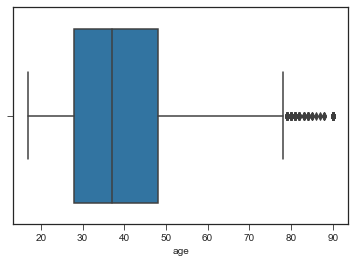

In [122]:
sns.boxplot(df['age'])  # outliers are present in age section

In [123]:
#df['capital.loss'].value_counts()

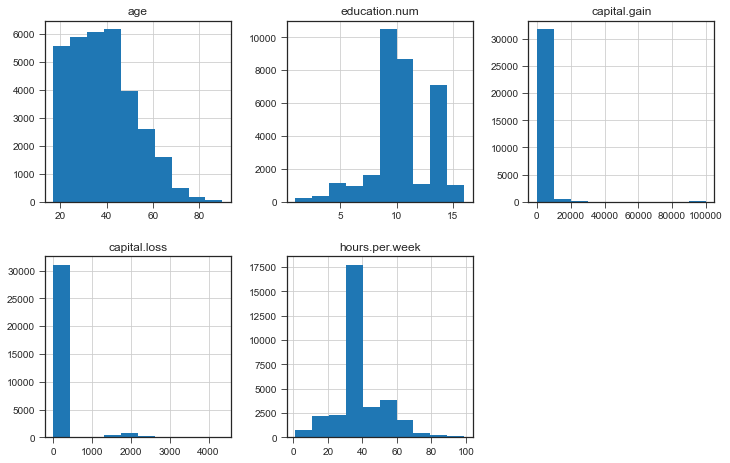

In [124]:
df.hist(figsize = (12,12) , layout=(3,3))
plt.show()

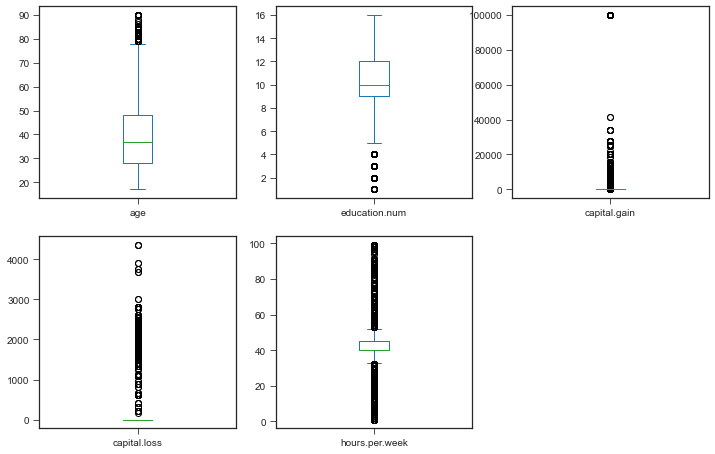

In [125]:
df.plot(kind = 'box',figsize = (12,12) , layout = (3,3) , sharex = False , subplots = True);

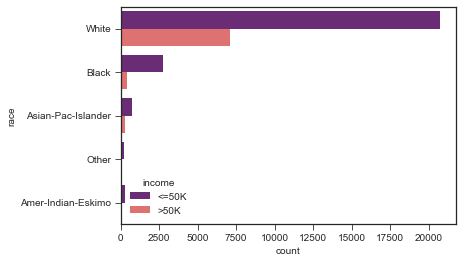

In [126]:
sns.countplot( y ='race' , hue = 'income' , data = df , palette = 'magma');

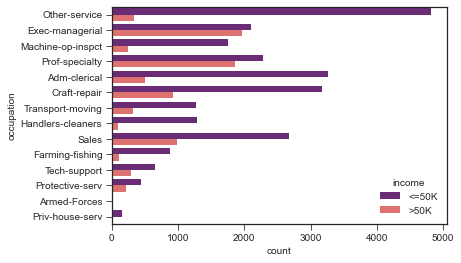

In [127]:
sns.countplot( y ='occupation' , hue = 'income' , data = df , palette = 'magma');

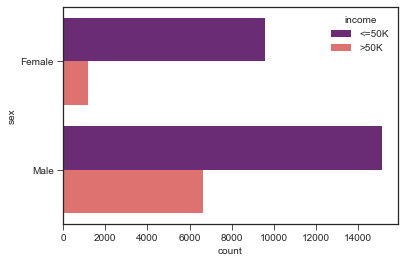

In [128]:
sns.countplot( y ='sex' , hue = 'income' , data = df , palette = 'magma');

In [129]:
df['hours.per.week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

In [130]:
# Removing outliers 
for cols in df.columns:
    if df[cols].dtype!='object':
        q1=df[cols].quantile(0.25)
        q3=df[cols].quantile(0.75)
        q2=q3-q1
        low=q1-(1.5*q2)
        high=q3+(1.5*q2)
        (df.loc[(df[cols]<low) | (df[cols]>high),cols])=df[cols].median()

In [131]:
df.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country', 'income'],
      dtype='object')

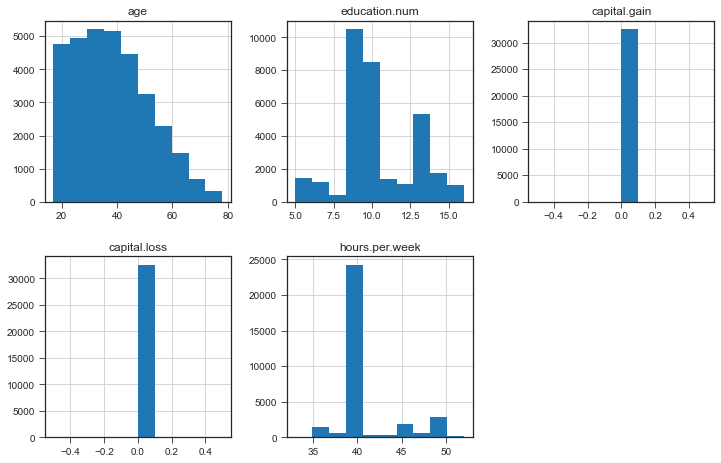

In [132]:
df.hist(figsize = (12,12) , layout=(3,3))
plt.show()

### categorical to numerical

In [133]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [134]:
# to convert the labelled (non - numeric ) to numeric
df['income'] = df['income'].replace({'<=50K':0 , '>50K':1})

In [135]:
df = pd.get_dummies(df)

In [136]:
df.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,37,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,66,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,54,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [137]:
df.select_dtypes(['object']).columns  # hence no categorical variable are present

Index([], dtype='object')

In [138]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

#### some rules
##### Accuracy : higher the accuracy better the model
##### TPR(recalll) : higher the recall better the model
##### FPR lower the fpr better the model
##### Precision : higher the precision better the model
##### F1 : Higher the F! better the model

In [139]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

The class distribution is then summarized, confirming a modest class imbalance with approximately 75 percent for the majority class (<=50K)

and approximately 25 percent for the minority class (>50K). we need to balanced the data so the accuracy would not be baised.

In [140]:
# we should apply straified sampling
from sklearn.model_selection import train_test_split
stratified_x = df.drop(['income'] , axis = 1)
stratified_y = df.iloc[:,[5]]
train_X , test_X , train_y , test_y = train_test_split(stratified_x ,stratified_y , test_size=0.20 , stratify=stratified_y,random_state = 0)

In [141]:
train_X.shape

(26048, 82)

In [142]:
test_y.shape

(6513, 1)

In [143]:
train_y = np.ravel(train_y, order='C')

In [144]:
train_y.shape

(26048,)

In [145]:
train_X.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
29335,55,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12007,46,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
10864,20,10,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3762,40,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
12086,30,6,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [147]:
train_X.std()

0.981536873554092

In [148]:
train_X.mean()

-2.8874980085534725e-18

In [149]:
test_X.std()

0.9815368735540918

In [150]:
test_X.mean()

7.184375663503276e-19

In [151]:
#### std = 1 and mean = 0 it means my data is succefully standardised 

## Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X , train_y)

LogisticRegression()

In [153]:
pred_y = lr.predict(test_X)

In [154]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score,roc_auc_score,f1_score,recall_score
confusion_matrix(test_y , pred_y)

array([[4558,  387],
       [ 740,  828]], dtype=int64)

In [155]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8269614616920006
precision: 0.6814814814814815
roc_curve: 0.7249001774622892
f1_score: 0.5950413223140496


In [156]:
roc_auc_score(test_y , pred_y)

0.7249001774622892

In [157]:
fpr = 603/(603+564)
fpr

0.5167095115681234

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4945
           1       0.68      0.53      0.60      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.72      0.74      6513
weighted avg       0.82      0.83      0.82      6513



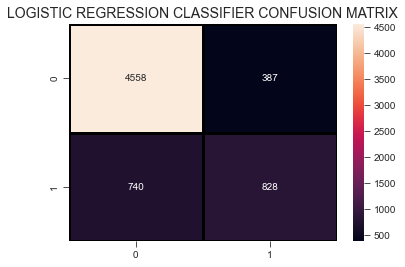

In [158]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [159]:
# CV of logisitic regression
lr_grid={'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty':['elasticnet', 'l1', 'l2']  }
from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(lr , lr_grid)
grid_lr.fit(train_X , train_y);

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

In [160]:
grid_lr.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [161]:
lr = LogisticRegression(penalty =  'l1', solver = 'liblinear')
lr.fit(train_X, train_y)
pred_y = lr.predict(test_X)
confusion_matrix(test_y , pred_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[4557,  388],
       [ 740,  828]], dtype=int64)

In [162]:
print(accuracy_score(test_y , pred_y))
print(precision_score(test_y , pred_y))

0.8268079226163059
0.680921052631579


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4945
           1       0.68      0.53      0.59      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.72      0.74      6513
weighted avg       0.82      0.83      0.82      6513



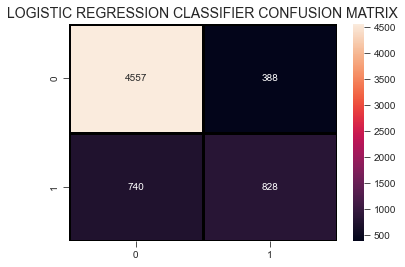

In [163]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## KNN Classifier

In [164]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)

In [165]:
confusion_matrix(test_y , pred_y)

array([[4445,  500],
       [ 696,  872]], dtype=int64)

In [166]:
accuracy_score(test_y , pred_y)

0.8163672654690619

In [167]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8163672654690619
precision: 0.6355685131195336
roc_curve: 0.7275051071996038
f1_score: 0.5931972789115647


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4945
           1       0.64      0.56      0.59      1568

    accuracy                           0.82      6513
   macro avg       0.75      0.73      0.74      6513
weighted avg       0.81      0.82      0.81      6513



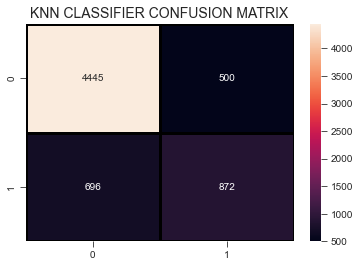

In [168]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [169]:
# Cross Validation
parameter_dict={'n_neighbors':[1,11,21,31,41,51,75,101]}
from sklearn.model_selection import GridSearchCV
grid_df=GridSearchCV(knn,param_grid=parameter_dict)
grid_df.fit(train_X , train_y)
grid_df.best_params_

{'n_neighbors': 51}

In [170]:
knn=KNeighborsClassifier(n_neighbors=41,weights='distance')
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)
a = confusion_matrix(test_y , pred_y)
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('Confusion :',a)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

Confusion : [[4578  367]
 [ 717  851]]
accuracy : 0.8335636419468755
precision: 0.6986863711001642
roc_curve: 0.7342566058273664
f1_score: 0.6109117013639627


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4945
           1       0.70      0.54      0.61      1568

    accuracy                           0.83      6513
   macro avg       0.78      0.73      0.75      6513
weighted avg       0.82      0.83      0.83      6513



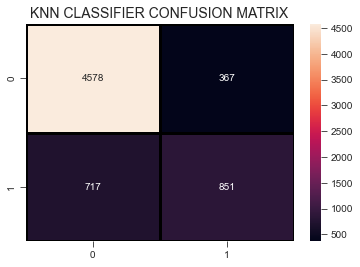

In [171]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## Decision Tree 

In [172]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_X , train_y)
pred_y=dt.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[4322,  623],
       [ 755,  813]], dtype=int64)

In [173]:
accuracy_score(test_y , pred_y)

0.7884231536926147

In [174]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.7884231536926147
precision: 0.5661559888579387
roc_curve: 0.6962545268360124
f1_score: 0.5412782956058588


              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4945
           1       0.57      0.52      0.54      1568

    accuracy                           0.79      6513
   macro avg       0.71      0.70      0.70      6513
weighted avg       0.78      0.79      0.79      6513



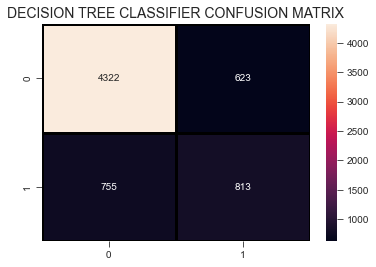

In [175]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [176]:
# Cross Validation
parameter_dict={'criterion':['gini','entropy'],'max_depth':[1,30,4],
    'min_samples_split':[1,2,3,4,5]}
grid_model=GridSearchCV(dt,param_grid=parameter_dict)
grid_model.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 30, 4],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [177]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [178]:
dt_grid=dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_split= 2)

In [179]:
dt_grid.fit(train_X, train_y)
pred_y=dt_grid.predict(test_X)
confusion_matrix(test_y,pred_y)

array([[4625,  320],
       [ 808,  760]], dtype=int64)

In [180]:
255/(255+4690)

0.05156723963599596

In [181]:
accuracy_score(test_y,pred_y)

0.8268079226163059

In [182]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8268079226163059
precision: 0.7037037037037037
roc_curve: 0.7099910237097872
f1_score: 0.5740181268882176


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4945
           1       0.70      0.48      0.57      1568

    accuracy                           0.83      6513
   macro avg       0.78      0.71      0.73      6513
weighted avg       0.82      0.83      0.81      6513



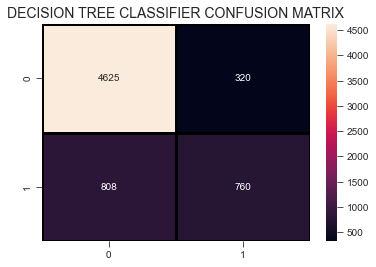

In [183]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

### Bagging Classifier

In [184]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier( n_estimators=100,bootstrap=True,oob_score=True,random_state=42)
bg.fit(train_X , train_y)
pred_y=bg.predict(test_X)
confusion_matrix(test_y,pred_y)

array([[4392,  553],
       [ 695,  873]], dtype=int64)

In [185]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8083832335329342
precision: 0.6122019635343618
roc_curve: 0.7224650363178639
f1_score: 0.5831663326653307


              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4945
           1       0.61      0.56      0.58      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.72      0.73      6513
weighted avg       0.80      0.81      0.81      6513



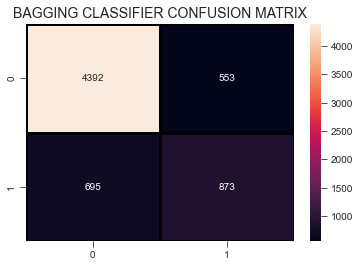

In [186]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("BAGGING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [187]:
# Cross Validation
from sklearn.model_selection import GridSearchCV
param_grid_bagging = {'n_estimators':list(range(1,100,10))}
grid = GridSearchCV(bg , param_grid=param_grid_bagging)
grid.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This prob

GridSearchCV(estimator=BaggingClassifier(n_estimators=100, oob_score=True,
                                         random_state=42),
             param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]})

In [188]:
grid.best_params_

{'n_estimators': 81}

In [189]:
bg = BaggingClassifier(n_estimators=31 , bootstrap=True , oob_score=True)
bg.fit(train_X , train_y)
pred_y = bg.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[4382,  563],
       [ 693,  875]], dtype=int64)

In [190]:
accuracy_score(test_y , pred_y)

0.8071549209273761

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4945
           1       0.61      0.56      0.58      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.72      0.73      6513
weighted avg       0.80      0.81      0.80      6513



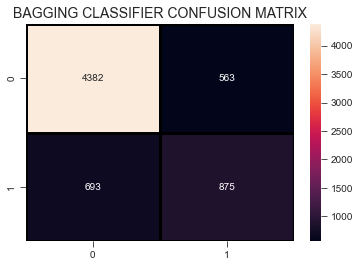

In [191]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("BAGGING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

### Random Classifier

In [192]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_X , train_y)
pred_y = rf.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[4418,  527],
       [ 719,  849]], dtype=int64)

In [194]:
accuracy_score(test_y , pred_y)

0.8086903116843237

In [195]:
w = accuracy_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8086903116843237
precision: 0.6170058139534884
roc_curve: 0.7174408931924641
f1_score: 0.5767663043478262


              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4945
           1       0.62      0.54      0.58      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.72      0.73      6513
weighted avg       0.80      0.81      0.80      6513



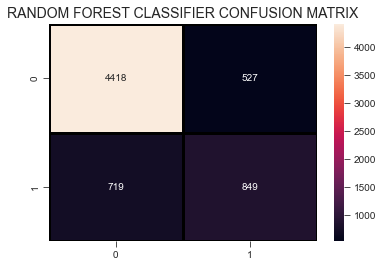

In [196]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

### SVM

In [197]:
from sklearn.svm import SVC
svm= SVC(degree=4)
svm.fit(train_X , train_y)
y_pred_svm=svm.predict(test_X)
w = accuracy_score(test_y ,y_pred_svm)
x = precision_score(test_y , y_pred_svm)
y = roc_auc_score(test_y , y_pred_svm)
z = f1_score(test_y ,y_pred_svm)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8297251650545063
precision: 0.6969957081545064
roc_curve: 0.7232359526216958
f1_score: 0.5942188071716064


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4945
           1       0.70      0.52      0.59      1568

    accuracy                           0.83      6513
   macro avg       0.78      0.72      0.74      6513
weighted avg       0.82      0.83      0.82      6513



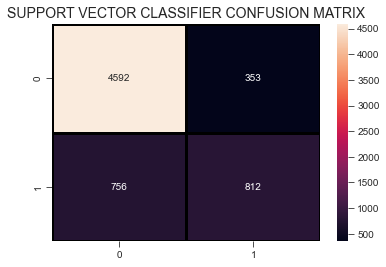

In [198]:
from sklearn.metrics import classification_report
print(classification_report(test_y , y_pred_svm))
sns.heatmap(confusion_matrix(test_y , y_pred_svm),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

### Voting classifier

In [199]:
lr=LogisticRegression(random_state=42)
knn=KNeighborsClassifier(n_neighbors=41,weights='distance')
dt_grid=DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_split= 2,random_state=42)
rf=RandomForestClassifier(n_estimators=100,criterion= 'gini', max_depth= 4, min_samples_split= 2,random_state=42)
bg=BaggingClassifier( n_estimators=100,bootstrap=True,oob_score=True,random_state=42)

In [200]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier([('knn',knn),('dt',dt_grid),('rf',rf),('bg',bg)],voting='hard',n_jobs=5)
voting_clf.fit(train_X , train_y)
y_pred_voting_clf=voting_clf.predict(test_X)
confusion_matrix(test_y,y_pred_voting_clf)

array([[4760,  185],
       [ 961,  607]], dtype=int64)

In [201]:
w = accuracy_score(test_y ,y_pred_voting_clf)
x = precision_score(test_y , y_pred_voting_clf)
y = roc_auc_score(test_y , y_pred_voting_clf)
z = f1_score(test_y ,y_pred_voting_clf)
print('accuracy :',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.8240442192538001
precision: 0.7664141414141414
roc_curve: 0.6748529100720166
f1_score: 0.514406779661017


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4945
           1       0.77      0.39      0.51      1568

    accuracy                           0.82      6513
   macro avg       0.80      0.67      0.70      6513
weighted avg       0.82      0.82      0.80      6513



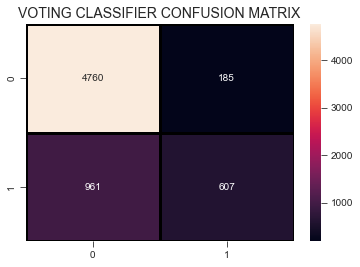

In [202]:
from sklearn.metrics import classification_report
print(classification_report(test_y , y_pred_voting_clf))
sns.heatmap(confusion_matrix(test_y , y_pred_voting_clf),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("VOTING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

## XGBOOST CLASSIFIER

In [203]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_dept = 5 , min_child_weight = 1)
xgb.fit(train_X , train_y)
pred_y = xgb.predict(test_X)
confusion_matrix(test_y , pred_y)

[00:16:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_dept" } are not used.



array([[4533,  412],
       [ 655,  913]], dtype=int64)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4945
           1       0.69      0.58      0.63      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.75      0.76      6513
weighted avg       0.83      0.84      0.83      6513



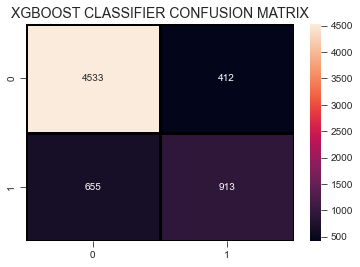

In [206]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBOOST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

### CONCLUSION : XGBOOST Classifier shows Highest Accuracy , Precision , Recall and F1score , so we should go with XGBOOST CLASSIFIER MODEL